In [1]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl

In [2]:
rmin, rmax, Npoints_r = 0.,1.,200
phimin, phimax, Npoints_phi = 0., 2.*np.pi, 200

r = np.linspace(rmin,rmax,Npoints_r)
phi = np.linspace(phimin,phimax,Npoints_phi)

dr = (rmax-rmin)/(Npoints_r-1)
dphi = (phimax-phimin)/(Npoints_phi-1)

lambda_ = dr/dphi
print(lambda_)

0.15915494309189535


In [3]:
T = np.zeros((Npoints_r,Npoints_phi))

def h1(phi):
    return 20.

# Condicion de frontera
T[-1,:] = 20

print(T)

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [20. 20. 20. ... 20. 20. 20.]]


In [4]:
def GetRelaxation(Nit = 700, omega = 1.3, tolerancia = 1e-2):
    print('--- Solving with Relaxation Method ---')
    
    for it in range(Nit):    
        
        dmax = 0.
        for i in range(1, len(r)-1):
            for j in range(len(phi)):
                
                # Condicion de periodicidad
                if j == len(phi)-1:
                    b = 1
                else:
                    b = j+1
                    
                c = 2. - dr/r[i] + 2*(lambda_/r[i])**2
                
                tmp = T[i+1,j] + (1-dr/r[i])*T[i-1,j] + \
                (lambda_/r[i])**2*(T[i,b]+T[i,j-1])
                
                tmp /= c
                
                r1 = omega*(tmp-T[i,j])
                T[i,j] += r1
                
                if(np.abs(r1) > dmax):
                    dmax = r1
                    
        print(dmax)
        
        if(dmax < tolerancia):
            print(it)
            break

In [5]:
GetRelaxation()

--- Solving with Relaxation Method ---
13.126871458782231
8.611912497886639
5.647392313784063
3.701765621354152
2.425408713472493
1.588467281904676
1.1365636825382999
0.9556202693412033
0.8229758355033321
0.7207718915469334
0.637378565285123
0.5760358789390029
0.5257727021688585
0.48123093398804023
0.4419034363333378
0.41150434237099914
0.3846542169041303
0.36008757725680207
0.3376689579051016
0.3185288497132249
0.30220392454986095
0.2869519498177713
0.2727345949891065
0.25949653063497635
0.24809231016215272
0.23789503270991583
0.22824553034779313
0.2191263050514082
0.21051456112668757
0.20260606626410987
0.1957444415134387
0.18918657550361537
0.18292502876511652
0.17695008686497787
0.17125061960871585
0.1660153555537252
0.16132830692429634
0.15681722823071162
0.15247800757358104
0.14830571327096206
0.1442948696191256
0.14043966564724064
0.13706473887892054
0.13380489877629165
0.13065050716625848
0.12759908102386258
0.12464786693088117
0.1217939273294638
0.1190539624645787
0.1166093182

0.014133791937335261
0.01409999408132503
0.01406631013487356
0.014032739782665882
0.013999282706990001
0.013965938587851223
0.013932707103043729
0.013899587928245262
0.013867505113324708
0.013835617766211339
0.013803831750598584
0.01377214683613044
0.013740562789603583
0.013709079375064359
0.013677696353899994
0.013646413484910181
0.013615230524406385
0.013584147226297283
0.013553163342158036
0.013522278621318051
0.013491492810937178
0.013460805656083074
0.01343021689979933
0.01339972628318975
0.013369333545477247
0.013339038424080041
0.013308840654680942
0.013279463732257302
0.013250362902298907
0.013221350087213413
0.013192425099087935
0.013163587747699169
0.013134837840594216
0.013106175183144853
0.01307759957862258
0.013049110828263278
0.013020708731327258
0.012992393085163912
0.012964163685274066
0.012936020325378106
0.012907962797452922
0.012879990891808113
0.012852104397141418
0.012824303100584888
0.012796586787762632
0.012768955242849689
0.012741670490460422
0.01271502177006427

<IPython.core.display.Javascript object>


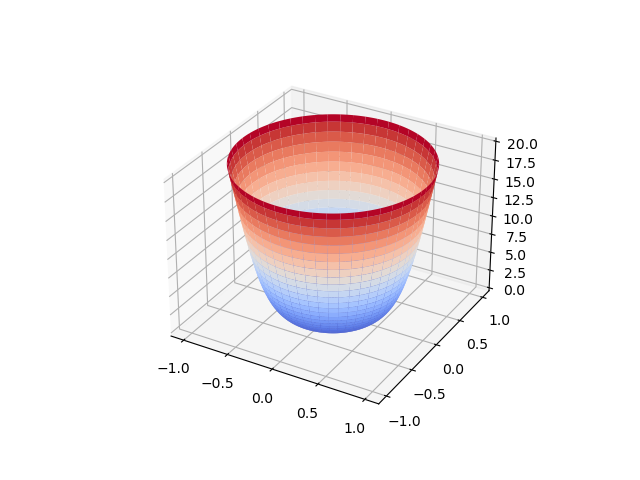

In [6]:
# Plotting

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

R, Phi = np.meshgrid(r,phi)

# Hacemos el cambio de coordenadas
X, Y = R*np.cos(Phi), R*np.sin(Phi)

ax.plot_surface(X,Y,T.T, cmap=cm.coolwarm)